## Ejemplo 2: Error estándar e intervalos de confianza

### 1. Objetivos:
    - Aprender a obtener e interpretar el error estándar y los intervalos de confianza
 
---
    
### 2. Desarrollo:

### a) Error estándar

Recordarás que la desviación estándar es una medida de dispersión de nuestros datos. Bueno, pues el error estándar es la desviación estándar de nuestra serie de medidas estadísticas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Repito lo del boostrap del cuaderno (jupyter notebook) pasado

glucose = df['glucose']

means = []

for i in range(100_000):
    sample = glucose.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

In [4]:
# Para obtener el error estándar simplemente calculo la desviación estándar
# de la lista donde guardamos las medias de cada muestra boostrap

print(f'Error estandar: {serie_means.std()}')

Error estandar: 4.534415482000298


Recuerda que para poder interpretar correctamente la desviación estándar tienes que saber un poco acerca del rango y distribución de tus datos:

In [5]:
# Vamos a comparar este valor con el de los datos originales

print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 102.84
Valor máximo: 139.86
Rango: 37.02000000000001


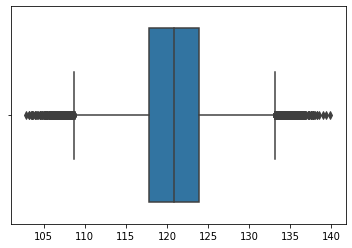

In [9]:
# Obtengamos un boxplot de la lista de las medias (ojo no de los datos originales)

sns.boxplot(x=serie_means);

Vamos a preguntarnos:

1. ¿Cómo podemos interpretar la desviación estándar? ¿Qué implica una mayor o menor desviación estándar?
2. ¿Por qué necesitamos saber el rango de nuestros datos para interpretar correctamente la desviación estándar?

porque la desviación se compara con el rango, si éstos son parecidos significa que hay muuuucha variabilidad. Si la desviación es muuuuy pequeña con respecto al rango, significa que hay poca variabilidad

3. ¿En este caso específico qué significa la desviación estándar que obtuvimos?

4.53 vs 37 (rango) es pequeño, por lo tanto la variabilidad es pequeña. Significa que le media tiene poca variabilidad

### b) Intervalos de confianza

Los intervalos de confianza son una manera de cuantificar la incertidumbre que existe en nuestra medida estadística. Si pudiéramos regresar a nuesta fuente original a tomar más muestras, el intervalo de confianza sería el intervalo numérico en el cual podemos asegurar con cierto nivel de seguridad que caería nuestra nueva medición estadística.

Para obtener un intervalo de 95% de confianza, por ejemplo, tenemos que tomar nuestro histograma, removerle 2.5% de valores al principio y al final, y obtener los nuevos valores mínimo y máximo. De esta manera el 95% de los valores originales quedan dentro de este nuevo intervalo.

Podemos obtener nuestro intervalo de confianza utilizando cuantiles:

In [10]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

Podemos escribir nuestro intervalo de confianza de dos maneras distintas:

In [11]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {glucose.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 112.04 < 120.89453125 < 129.88


In [19]:
mean_of_intervals = ((glucose.mean() - limite_inferior) + (limite_superior - glucose.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {glucose.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 120.89453125 +/- 8.88024999999999


Podemos visualizar estos límites también:

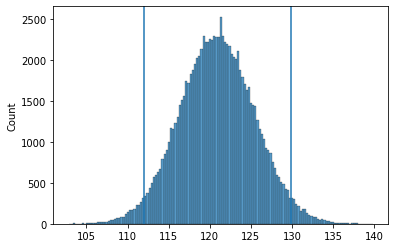

In [13]:
sns.histplot(serie_means, kde=False)
plt.axvline(limite_inferior)

plt.axvline(limite_superior);

Interpretación:

El 95% de nuestras medias (OJO: NO de nuestros datos originales necesariamente) se encuentra entre 112 y 130